In [1]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
from astropy.io import fits

local_dir="/home/colgoat/Jupyter/"
fileDR14 = "exDR14Qcat.fits"
fileDR16 = "exDR16Qcat.fits"
fileDESI_sv1 = "QSO_cat_fuji_sv1_dark_bal_mask_v1.0.fits"
fileDESI_sv3 = "QSO_cat_fuji_sv3_dark_bal_mask_v1.0.fits"


local_fileDR14 = os.path.join(local_dir,fileDR14)
local_fileDR16 = os.path.join(local_dir,fileDR16)
local_fileDESI_sv1 = os.path.join(local_dir,fileDESI_sv1)
local_fileDESI_sv3 = os.path.join(local_dir,fileDESI_sv3)

dr14 = Table.read(local_fileDR14)
dr16 = Table.read(local_fileDR16)
sv1 = Table.read(local_fileDESI_sv1)
sv3 = Table.read(local_fileDESI_sv3)

In [2]:
sv1_class =  (sv1['Z']>=2.1) & (sv1['PROGRAM']=='dark') & (sv1['SURVEY']=='sv1')
sv3_class =  (sv3['Z']>=2.1) & (sv3['PROGRAM']=='dark') & (sv3['SURVEY']=='sv3')

w1 = dr14['Z']<=6
w2 = dr16['Z']<=6

dr14 = dr14[w1]
dr16 = dr16[w2]

c_sv1 = sv1[sv1_class]
c_sv3 = sv3[sv3_class]

In [3]:
def hour(d):
    h = d*(24/360)
    return h

def rad(d):
    r = d*((2*np.pi)/360)
    return r

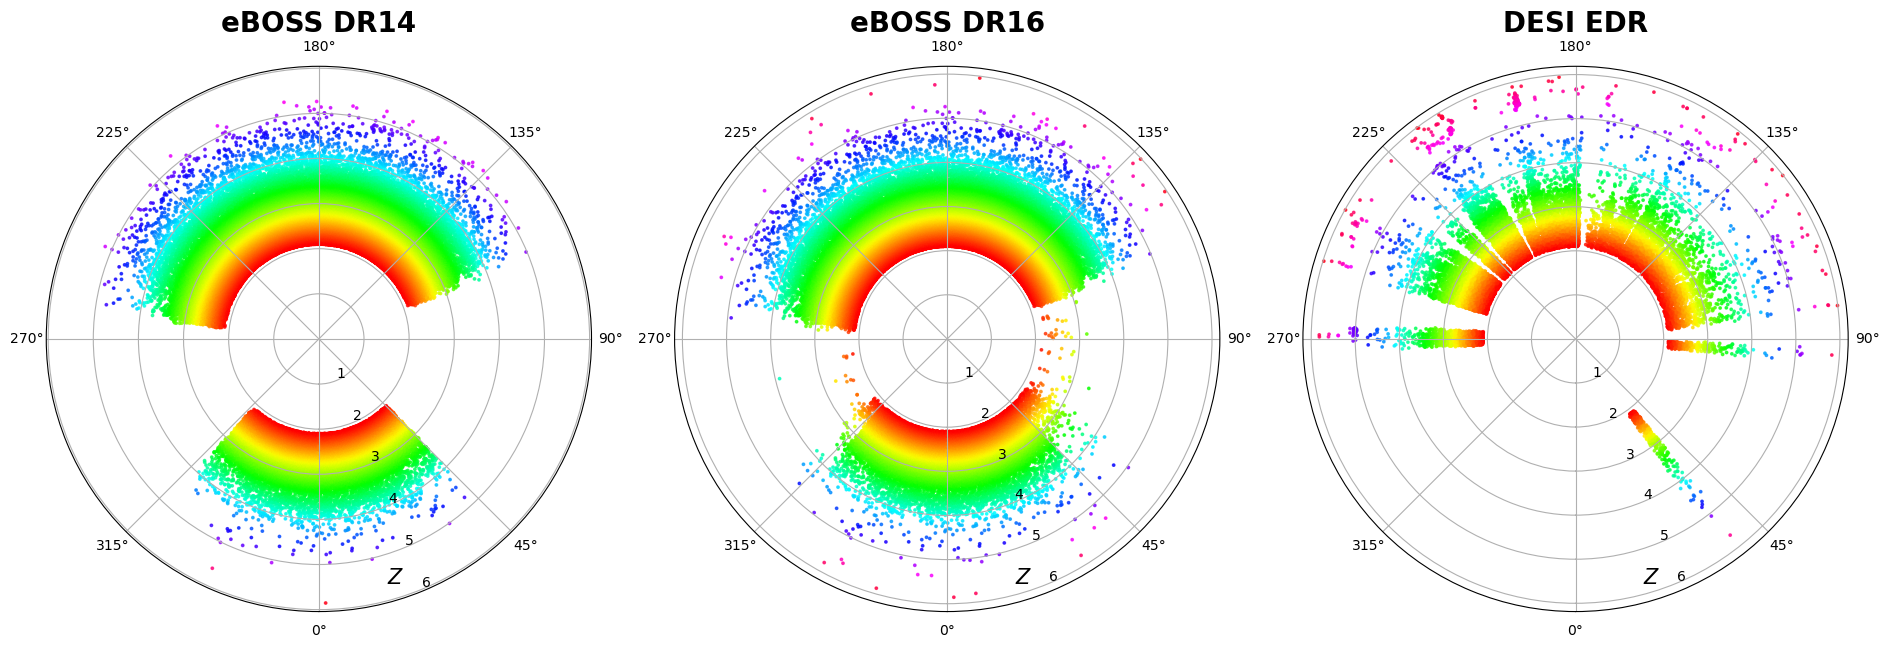

In [6]:
plt.rcParams["figure.figsize"] = [19, 10]
plt.rcParams["figure.autolayout"] = True
fig, (ax1, ax2, ax3) = plt.subplots(1,3,subplot_kw=dict(projection='polar'))

colorsDR14 = dr14['Z']
ax1.scatter(rad(dr14['RA']), dr14['Z'], c=colorsDR14, alpha=0.75,cmap='hsv', s=3)
ax1.set_theta_zero_location('W', offset=90)
ax1.set_title("eBOSS DR14",weight='bold',size = 20)
label_position1=ax1.get_rlabel_position()
ax1.text(np.radians(label_position1-5),ax1.get_rmax()-0.5,'Z',
        rotation=0,ha='center',va='center',size =15, style='italic')


colorsDR16 = dr16['Z']
ax2.scatter(rad(dr16['RA']), dr16['Z'], c=colorsDR16, alpha=0.75,cmap='hsv', s=3)
ax2.set_theta_zero_location('W', offset=90)
ax2.set_title("eBOSS DR16",weight='bold',size = 20)
label_position2=ax2.get_rlabel_position()
ax2.text(np.radians(label_position2-5),ax2.get_rmax()-0.5,'Z',
        rotation=0,ha='center',va='center',size =15, style='italic')


colorsSV1 = c_sv1['Z']
colorsSV3 = c_sv3['Z']
ax3.scatter(rad(c_sv1['TARGET_RA']), c_sv1['Z'], c=colorsSV1, alpha=0.75,cmap='hsv', s=3)
ax3.scatter(rad(c_sv3['TARGET_RA']), c_sv3['Z'], c=colorsSV3, alpha=0.75,cmap='hsv', s=3)
ax3.set_theta_zero_location('W', offset=90)
ax3.set_title("DESI EDR",weight='bold',size = 20)
label_position3=ax3.get_rlabel_position()
ax3.text(np.radians(label_position3-5),ax3.get_rmax()-0.5,'Z',
        rotation=0,ha='center',va='center',size =15, style='italic')

plt.show()
